In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

import json

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [2]:
# calculte scores for best model
# return: dict including f1, precision and recall (all macro)
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, average_precision_score


def calculate_scores(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    false_negative_rate = fn / (tp + fn)

    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f_n_r = false_negative_rate
    roc_auc = roc_auc_score(y_true, y_pred)
    avg_precision = average_precision_score(y_true, y_pred)

    print("f1_binary: " + str(f1) + ", precision_binary: " + str(precision) + ", recall_binary: " + str(recall) + ", accuracy: " + str(accuracy) +", False negative rate: " +str(f_n_r))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
    print(confusion_matrix(y_true, y_pred))
    return {
        "f1_binary": f1,
        "precision_binary": precision,
        "recall_binary": recall,
        "accuracy": accuracy,
        "f_n_r": f_n_r,
        "roc_auc": roc_auc,
        "avg_precision": avg_precision,
    }

In [3]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")

In [4]:
# Target column
y = df['stroke']
# Matrix
X  = df
X.drop('stroke', axis=1, inplace=True) 
X.drop('id', axis=1, inplace=True) 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [6]:
X_train.loc[0]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
Name: 0, dtype: object

In [7]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status']
categorical_transformer = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categories', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

In [40]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
pipe = Pipeline(
    steps = [
        ('preprocess', preprocessor),
        ('clf', CatBoostClassifier(depth =3, learning_rate  = 0.01,rsm = 0.5))
    ])

In [41]:
pipe.fit(X_train, y_train)

0:	learn: 0.6787622	total: 1.14ms	remaining: 1.14s
1:	learn: 0.6654102	total: 2.2ms	remaining: 1.1s
2:	learn: 0.6513309	total: 3.68ms	remaining: 1.22s
3:	learn: 0.6375609	total: 5.55ms	remaining: 1.38s
4:	learn: 0.6243544	total: 7.37ms	remaining: 1.47s
5:	learn: 0.6120708	total: 8.51ms	remaining: 1.41s
6:	learn: 0.6001321	total: 9.42ms	remaining: 1.34s
7:	learn: 0.5888301	total: 10.5ms	remaining: 1.3s
8:	learn: 0.5737607	total: 11.6ms	remaining: 1.27s
9:	learn: 0.5628518	total: 12.5ms	remaining: 1.24s
10:	learn: 0.5482400	total: 13.6ms	remaining: 1.22s
11:	learn: 0.5375984	total: 14.6ms	remaining: 1.2s
12:	learn: 0.5263272	total: 15.9ms	remaining: 1.21s
13:	learn: 0.5149357	total: 17.2ms	remaining: 1.21s
14:	learn: 0.5031324	total: 18.4ms	remaining: 1.21s
15:	learn: 0.4936583	total: 20.9ms	remaining: 1.29s
16:	learn: 0.4848423	total: 22ms	remaining: 1.27s
17:	learn: 0.4761362	total: 23ms	remaining: 1.26s
18:	learn: 0.4656522	total: 24.1ms	remaining: 1.24s
19:	learn: 0.4574592	total: 25

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('categories',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x7ff40b30f340>)])

f1_binary: 0.0, precision_binary: 0.0, recall_binary: 0.0, accuracy: 0.9393346379647749, False negative rate: 1.0
[[960   0]
 [ 62   0]]


/Users/patrickknab/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/patrickknab/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'f1_binary': 0.0,
 'precision_binary': 0.0,
 'recall_binary': 0.0,
 'accuracy': 0.9393346379647749,
 'f_n_r': 1.0,
 'roc_auc': 0.5,
 'avg_precision': 0.060665362035225046}

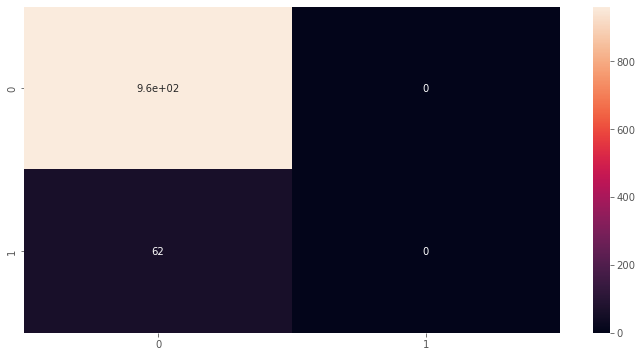

In [42]:
y_pred = pipe.predict(X_test)

calculate_scores(y_test, y_pred)

In [11]:
import joblib


joblib.dump(pipe, 'model.joblib')

['model.joblib']

In [12]:
pipeline = joblib.load('model.joblib') 

pipeline.predict(X_test)

/Users/patrickknab/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1])

In [13]:
# Fit and transform the data using the pipeline
X_preprocessed = pipe.fit_transform(X_train)

# Convert the preprocessed data into a pandas dataframe
df = pd.DataFrame(X_preprocessed)

# Print the preprocessed dataframe
print(df.head())

df.isnull().sum()

ValueError: This LogisticRegression estimator requires y to be passed, but the target y is None.

In [14]:
pipe.score(X_test, y_test)

/Users/patrickknab/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.7495107632093934

In [15]:


print(preprocessor.transform(X_test))



[[0.37683284 0.04491737 0.14547537 ... 0.         0.         0.        ]
 [0.48680352 0.04694857 0.20618557 ... 0.         0.         0.        ]
 [0.09579668 0.08909611 0.139748   ... 0.         0.         0.        ]
 ...
 [0.59677419 0.2962792  0.23024055 ... 0.         1.         0.        ]
 [0.68230694 0.33935001 0.1672394  ... 1.         0.         0.        ]
 [0.95112414 0.23677407 0.19473081 ... 0.         1.         1.        ]]


/Users/patrickknab/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
